## Prepare mesh

In [1]:
!gmsh circle.geo -2 >& /dev/null
!convert_msh.py circle.msh circle.xdmf
!gmsh ellipse.geo -2 >& /dev/null
!convert_msh.py ellipse.msh ellipse.xdmf

## Solution preparation

In [2]:
import logging
import bi2d
from bi2d.materials import vacuum, beam, steel
import numpy as np

Using steel for SIBC

In [3]:
beam.index = 1
vacuum.index = 2
steel.index = -1

Setup mesh and materials

In [4]:
circle_mesh = bi2d.Mesh("circle.xdmf")
ellipse_mesh = bi2d.Mesh("ellipse.xdmf")
circle_map = bi2d.MaterialMap(circle_mesh, [beam, vacuum])
ellipse_map = bi2d.MaterialMap(ellipse_mesh, [beam, vacuum])

In [5]:
(minx, miny), (maxx, maxy) = circle_mesh.get_limits(1)
print(f"Circle beam radius: {(maxx-minx)/2*1e3} [mm]")
(minx, miny), (maxx, maxy) = circle_mesh.get_limits(2)
print(f"Circle radius: {(maxx-minx)/2*1e3} [mm]")
(minx, miny), (maxx, maxy) = ellipse_mesh.get_limits(1)
print(f"Ellipse beam radius: {(maxx-minx)/2*1e3} [mm]")
(minx, miny), (maxx, maxy) = ellipse_mesh.get_limits(2)
print(f"Ellipse radius: {(maxx-minx)/2*1e3}x{(maxy-miny)/2*1e3} [mm]")

Circle beam radius: 2.0 [mm]
Circle radius: 8.0 [mm]
Ellipse beam radius: 2.0 [mm]
Ellipse radius: 57.0x8.0 [mm]


Configure solution

In [6]:
circle_solution = bi2d.Solution(circle_map, Hcurl_order=2, H1_order=2)
circle_solution.logger.setLevel(logging.WARNING)
ellipse_solution = bi2d.Solution(ellipse_map, Hcurl_order=2, H1_order=2)
ellipse_solution.logger.setLevel(logging.WARNING)

## Calculate impedance

### Monopole PEC

In [7]:
%%time

circle_data_monopole_pec = circle_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, source_function=bi2d.SourceFunction.MONOPOLE)
ellipse_data_monopole_pec = ellipse_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, source_function=bi2d.SourceFunction.MONOPOLE)

CPU times: user 4min 18s, sys: 9.38 s, total: 4min 27s
Wall time: 4min 32s


In [8]:
import pylab
pylab.rcParams['figure.figsize'] = [12, 8]

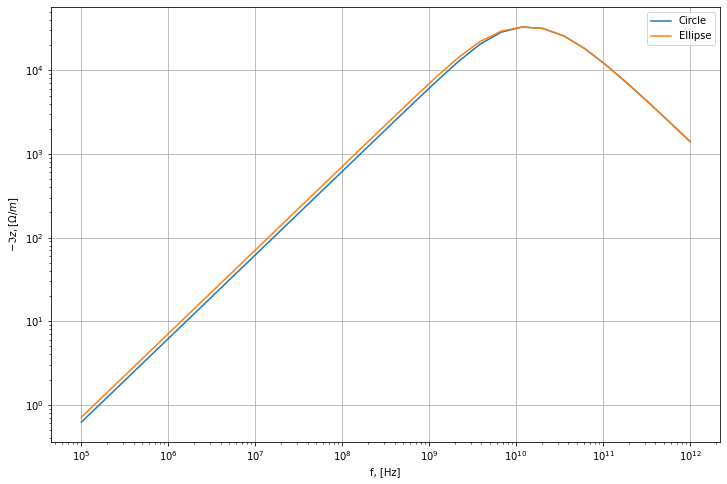

In [9]:
pylab.plot(circle_data_monopole_pec[:,0], -circle_data_monopole_pec[:,2])
pylab.plot(ellipse_data_monopole_pec[:,0], -ellipse_data_monopole_pec[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$-\Im{z}, [\Omega/m]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()

### Monopole SIBC

In [10]:
%%time

circle_data_monopole_sibc = circle_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, source_function=bi2d.SourceFunction.MONOPOLE, sibc=[steel])
ellipse_data_monopole_sibc = ellipse_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, source_function=bi2d.SourceFunction.MONOPOLE, sibc=[steel])

CPU times: user 4min 18s, sys: 7.82 s, total: 4min 25s
Wall time: 4min 27s


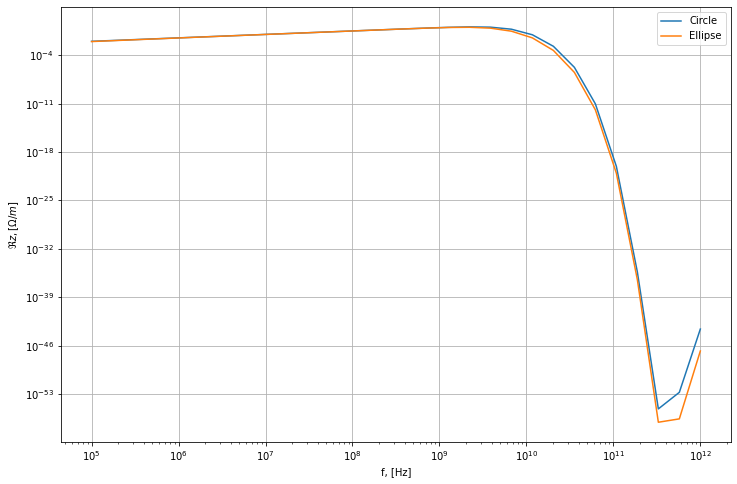

In [11]:
pylab.plot(circle_data_monopole_sibc[:,0], circle_data_monopole_sibc[:,1])
pylab.plot(ellipse_data_monopole_sibc[:,0], ellipse_data_monopole_sibc[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$\Re{z}, [\Omega/m]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()

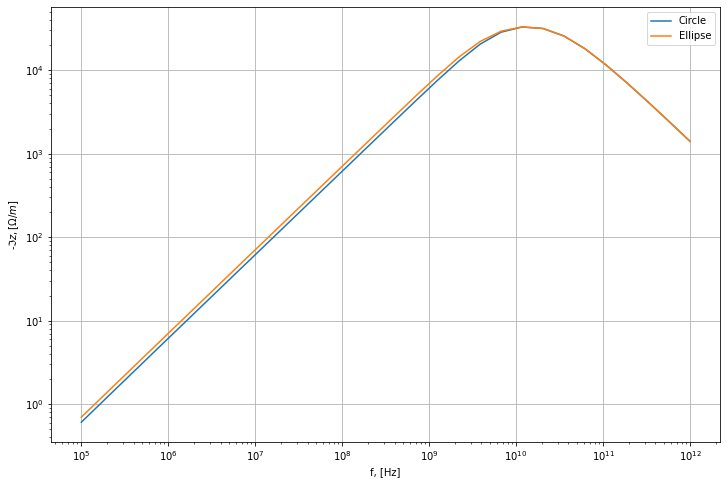

In [12]:
pylab.plot(circle_data_monopole_sibc[:,0], -circle_data_monopole_sibc[:,2])
pylab.plot(ellipse_data_monopole_sibc[:,0], -ellipse_data_monopole_sibc[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"-$\Im{z}, [\Omega/m]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()

### Dipole PEC rotation $0$

In [13]:
%%time

circle_data_dipole_pec_0 = circle_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, rotation=0, source_function=bi2d.SourceFunction.DIPOLE)
ellipse_data_dipole_pec_0 = ellipse_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, rotation=0, source_function=bi2d.SourceFunction.DIPOLE)

CPU times: user 4min 22s, sys: 7.98 s, total: 4min 30s
Wall time: 4min 31s


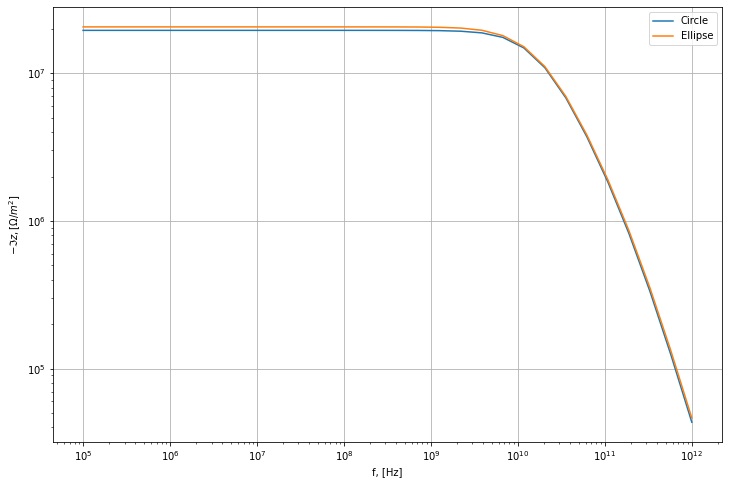

In [14]:
pylab.plot(circle_data_dipole_pec_0[:,0], -circle_data_dipole_pec_0[:,2])
pylab.plot(ellipse_data_dipole_pec_0[:,0], -ellipse_data_dipole_pec_0[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$-\Im{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()

### Dipole PEC rotation $90^\circ$

In [15]:
%%time

circle_data_dipole_pec_90 = circle_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE)
ellipse_data_dipole_pec_90 = ellipse_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE)

CPU times: user 4min 21s, sys: 8.24 s, total: 4min 29s
Wall time: 4min 30s


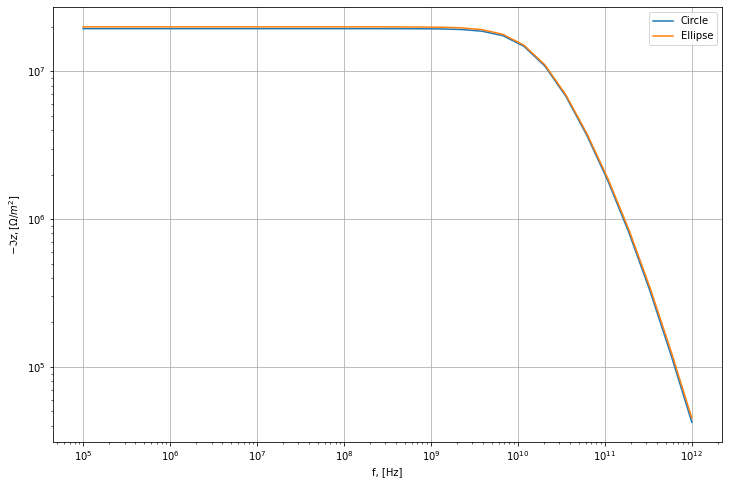

In [16]:
pylab.plot(circle_data_dipole_pec_90[:,0], -circle_data_dipole_pec_90[:,2])
pylab.plot(ellipse_data_dipole_pec_90[:,0], -ellipse_data_dipole_pec_90[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$-\Im{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()

### Dipole SIBC rotation 0

In [17]:
%%time

circle_data_dipole_sibc_0 = circle_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, source_function=bi2d.SourceFunction.DIPOLE, sibc=[steel])
ellipse_data_dipole_sibc_0 = ellipse_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, source_function=bi2d.SourceFunction.DIPOLE, sibc=[steel])

CPU times: user 4min 18s, sys: 7.75 s, total: 4min 26s
Wall time: 4min 27s


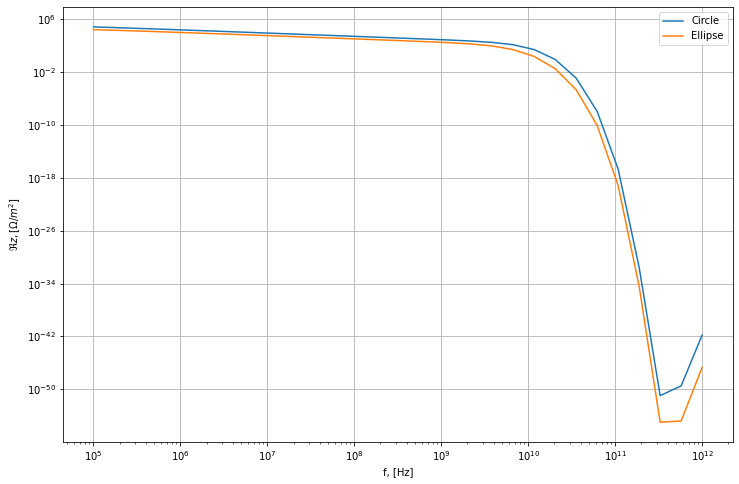

In [18]:
pylab.plot(circle_data_dipole_sibc_0[:,0], circle_data_dipole_sibc_0[:,1])
pylab.plot(ellipse_data_dipole_sibc_0[:,0], ellipse_data_dipole_sibc_0[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$\Re{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()

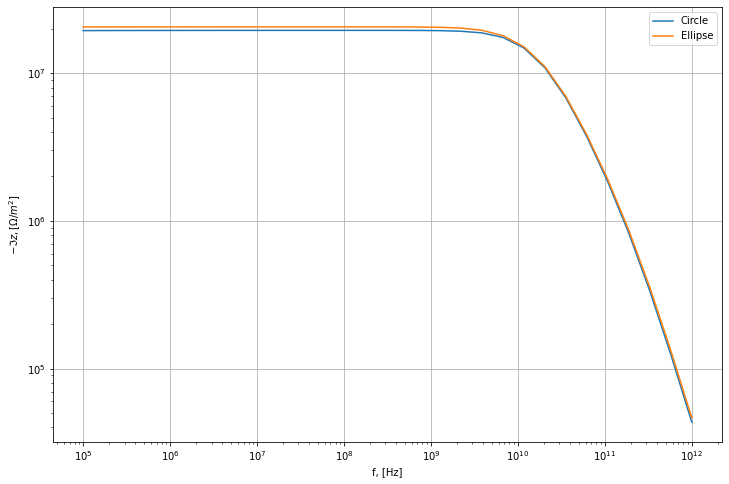

In [19]:
pylab.plot(circle_data_dipole_sibc_0[:,0], -circle_data_dipole_sibc_0[:,2])
pylab.plot(ellipse_data_dipole_sibc_0[:,0], -ellipse_data_dipole_sibc_0[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$-\Im{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()

### Dipole SIBC rotation $90^\circ$

In [20]:
%%time

circle_data_dipole_sibc_90 = circle_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE, sibc=[steel])
ellipse_data_dipole_sibc_90 = ellipse_solution.get_z(np.logspace(5, 12, num=30), beta=0.5, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE, sibc=[steel])

CPU times: user 4min 20s, sys: 7.91 s, total: 4min 28s
Wall time: 4min 28s


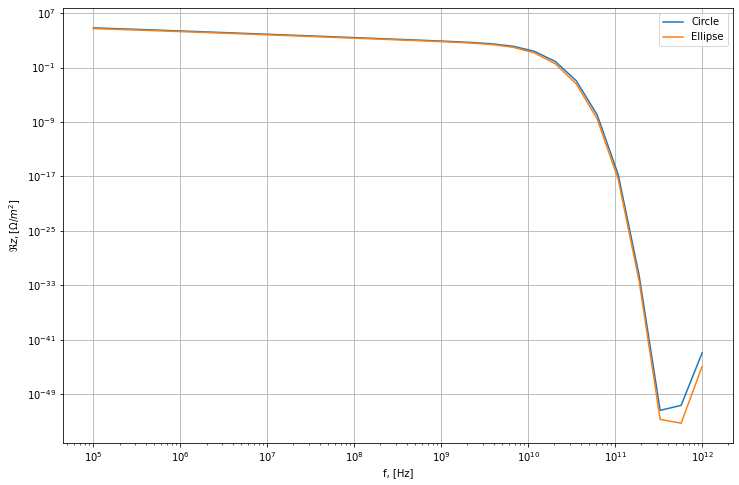

In [21]:
pylab.plot(circle_data_dipole_sibc_90[:,0], circle_data_dipole_sibc_90[:,1])
pylab.plot(ellipse_data_dipole_sibc_90[:,0], ellipse_data_dipole_sibc_90[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$\Re{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()

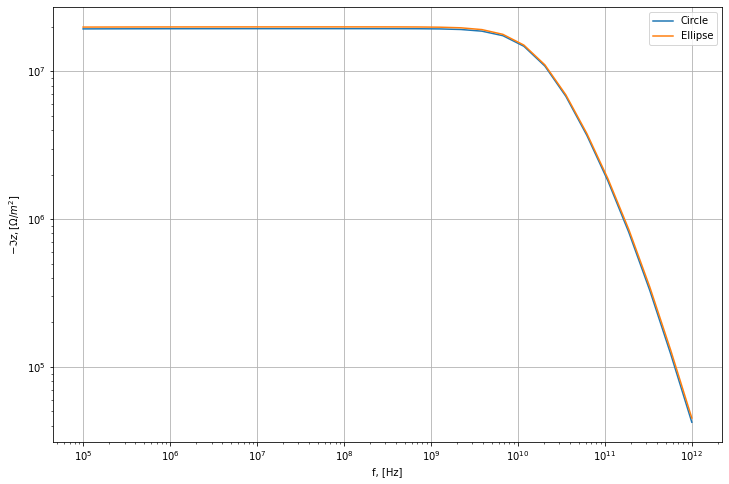

In [22]:
pylab.plot(circle_data_dipole_sibc_90[:,0], -circle_data_dipole_sibc_90[:,2])
pylab.plot(ellipse_data_dipole_sibc_90[:,0], -ellipse_data_dipole_sibc_90[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$-\Im{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"Circle", r"Ellipse"])
pylab.show()